In [84]:
import cv2
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pickle
import glob
from scipy.ndimage.measurements import label

In [89]:
def preprocess(image):
    
    median_kernel=3
    closing_kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3)) #np.ones((5,5), np.uint8)
    
    opening_kernel_height=int(image.shape[0]/4)
    opening_kernel_width =int(image.shape[0]/30)
    opening_kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(opening_kernel_width,opening_kernel_height))
    
    
    f, ( ax1, ax2, ax3, ax4 ) = plt.subplots(4, 1, figsize=(48, 18))
    f.tight_layout()
    
    image=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    ret,image = cv2.threshold(image,127,255,cv2.THRESH_BINARY)
    
    ax1.imshow(image,cmap='gray')
    ax1.set_title('grayscale', fontsize=50)
    
    #median blur
    median_image= cv2.medianBlur(image,median_kernel)  
    ax2.imshow(median_image, cmap='gray')
    ax2.set_title('medianBlur', fontsize=50)
    
    #morphological close
    closed_image=cv2.morphologyEx(median_image,cv2.MORPH_CLOSE,closing_kernel)
    ax3.imshow(closed_image, cmap='gray')
    ax3.set_title('closed_image', fontsize=50)
    
    #morphological_open
    open_image=cv2.morphologyEx(closed_image,cv2.MORPH_OPEN,opening_kernel)
    ax4.imshow(open_image, cmap='gray')
    ax4.set_title('open_image', fontsize=50)
    
    
    plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
    plt.show()
    
    return open_image

In [97]:
def draw_labeled_bboxes(img, labels):
    
    candidates = []
    # Iterate through all detected cars
    for root_candidate in range(1, labels[1]+1):
        # Find pixels with each root_candidate label value
        nonzero = (labels[0] == root_candidate).nonzero()
        # Identify x and y values of those pixels
        nonzeroy = np.array(nonzero[0])
        nonzerox = np.array(nonzero[1])
        # Define a bounding box based on min/max x and y
        bbox = ((np.min(nonzerox), np.min(nonzeroy)), (np.max(nonzerox), np.max(nonzeroy)))
        # Draw the box on the image
        cv2.rectangle(img, bbox[0], bbox[1], (0,0,255), 2)
        
        
        height = np.max(nonzeroy) - np.min(nonzeroy)
        width = np.max(nonzerox) - np.min(nonzerox)
        
        candidates.append(img[np.min(nonzeroy): np.min(nonzeroy) + height,  
                                  np.min(nonzerox) :  np.min(nonzerox) + width ])
        
    # Return the image
    return img,candidates

In [98]:
def find_candidates(processed_image,image):
    
    labels = label(processed_image)
    labelled_image, candidates = draw_labeled_bboxes(np.copy(image), labels)
    plt.imshow(labelled_image,cmap='gray')
    plt.show()
    
    return candidates

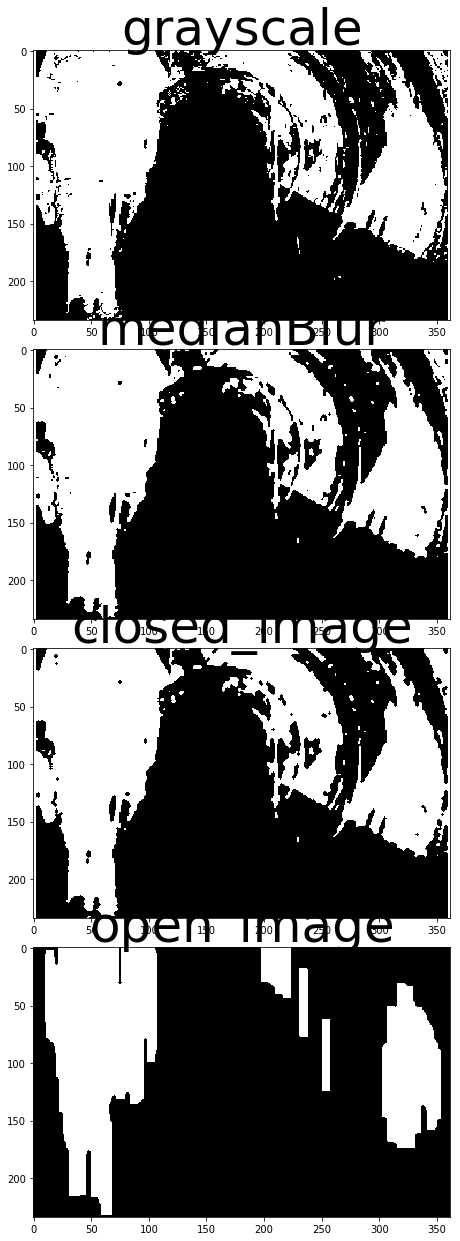

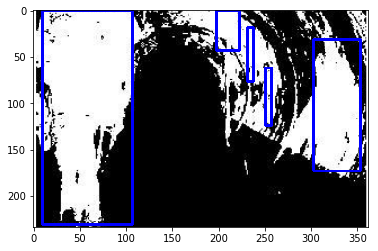

5


In [99]:
images = glob.glob('test_images/*.png')

for fname in images:
    image = cv2.imread(fname)
    
    
    processed_image = preprocess(image)
    
#     labels = label(processed_image)
#     labelled_image, candidates = draw_labeled_bboxes(np.copy(image), labels)
#     plt.imshow(labelled_image,cmap='gray')
    
    candidates = find_candidates(processed_image,image)
    
    print(len(candidates))    

5


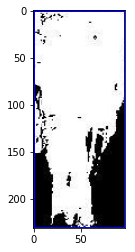

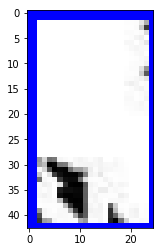

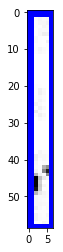

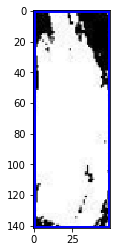

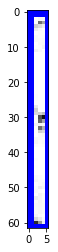

In [100]:
print(len(candidates))
for candidate in candidates:
    plt.imshow( candidate,cmap='gray' )
    plt.show()